In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import nibabel as nb
import seaborn as sns

### Plot eigenvalue distribution

In [22]:
eigen_vol = pickle.load(open( '/home/julia/data/gradients/old/results/embed_dict.pkl', 'rb'))
eigen_mesh = pickle.load(open( '/home/julia/data/gradients/results/embedding_mesh/embed_dict.pkl', 'rb'))

In [23]:
eigen_perc_vol = eigen_vol['lambdas']/np.sum(eigen_vol['lambdas'])*100
eigen_perc_mesh = eigen_mesh['lambdas']/np.sum(eigen_mesh['lambdas'])*100

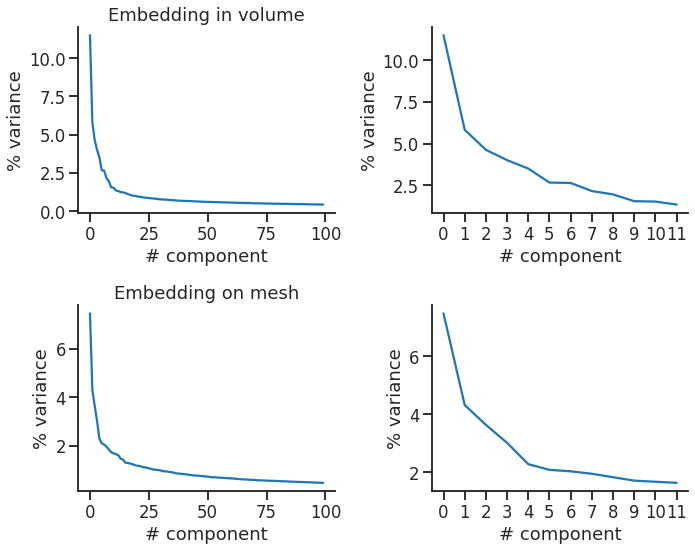

In [27]:
sns.set_context('talk')
sns.set_style('ticks')
fig = plt.figure(figsize=(10,8))

fig.add_subplot(221)
plt.title('Embedding in volume')
plt.plot(eigen_perc_vol)
plt.ylabel('% variance')
plt.xlabel('# component')
sns.despine()

fig.add_subplot(222)
plt.plot(eigen_perc_vol[:12])
plt.xticks(range(12))
plt.ylabel('% variance')
plt.xlabel('# component')

fig.add_subplot(223)
plt.title('Embedding on mesh')
plt.plot(eigen_perc_mesh)
plt.ylabel('% variance')
plt.xlabel('# component')
sns.despine()

fig.add_subplot(224)
plt.plot(eigen_perc_mesh[:12])
plt.xticks(range(12))
plt.ylabel('% variance')
plt.xlabel('# component')
sns.despine()

sns.despine()
plt.tight_layout()

In [8]:
#fig.savefig('/home/julia/Documents/projects/mouse_gradients/embedding_components.png')

### Plot first 6 components in Allen space

In [9]:
def jo2allen_vol(data):
    data = np.swapaxes(np.swapaxes(data, 0,1), 1,2)
    data = np.flip(np.flip(data,1),0)
    return data

In [10]:
template = nb.load('/home/julia/data/gradients/atlas/allen_api/template.nii.gz').get_data()
mask = nb.load('/home/julia/data/gradients/atlas/cortex/cortex_mask_25um.nii.gz').get_data()
mask_allen = jo2allen_vol(mask)

In [11]:
x=250
y=100
z=150

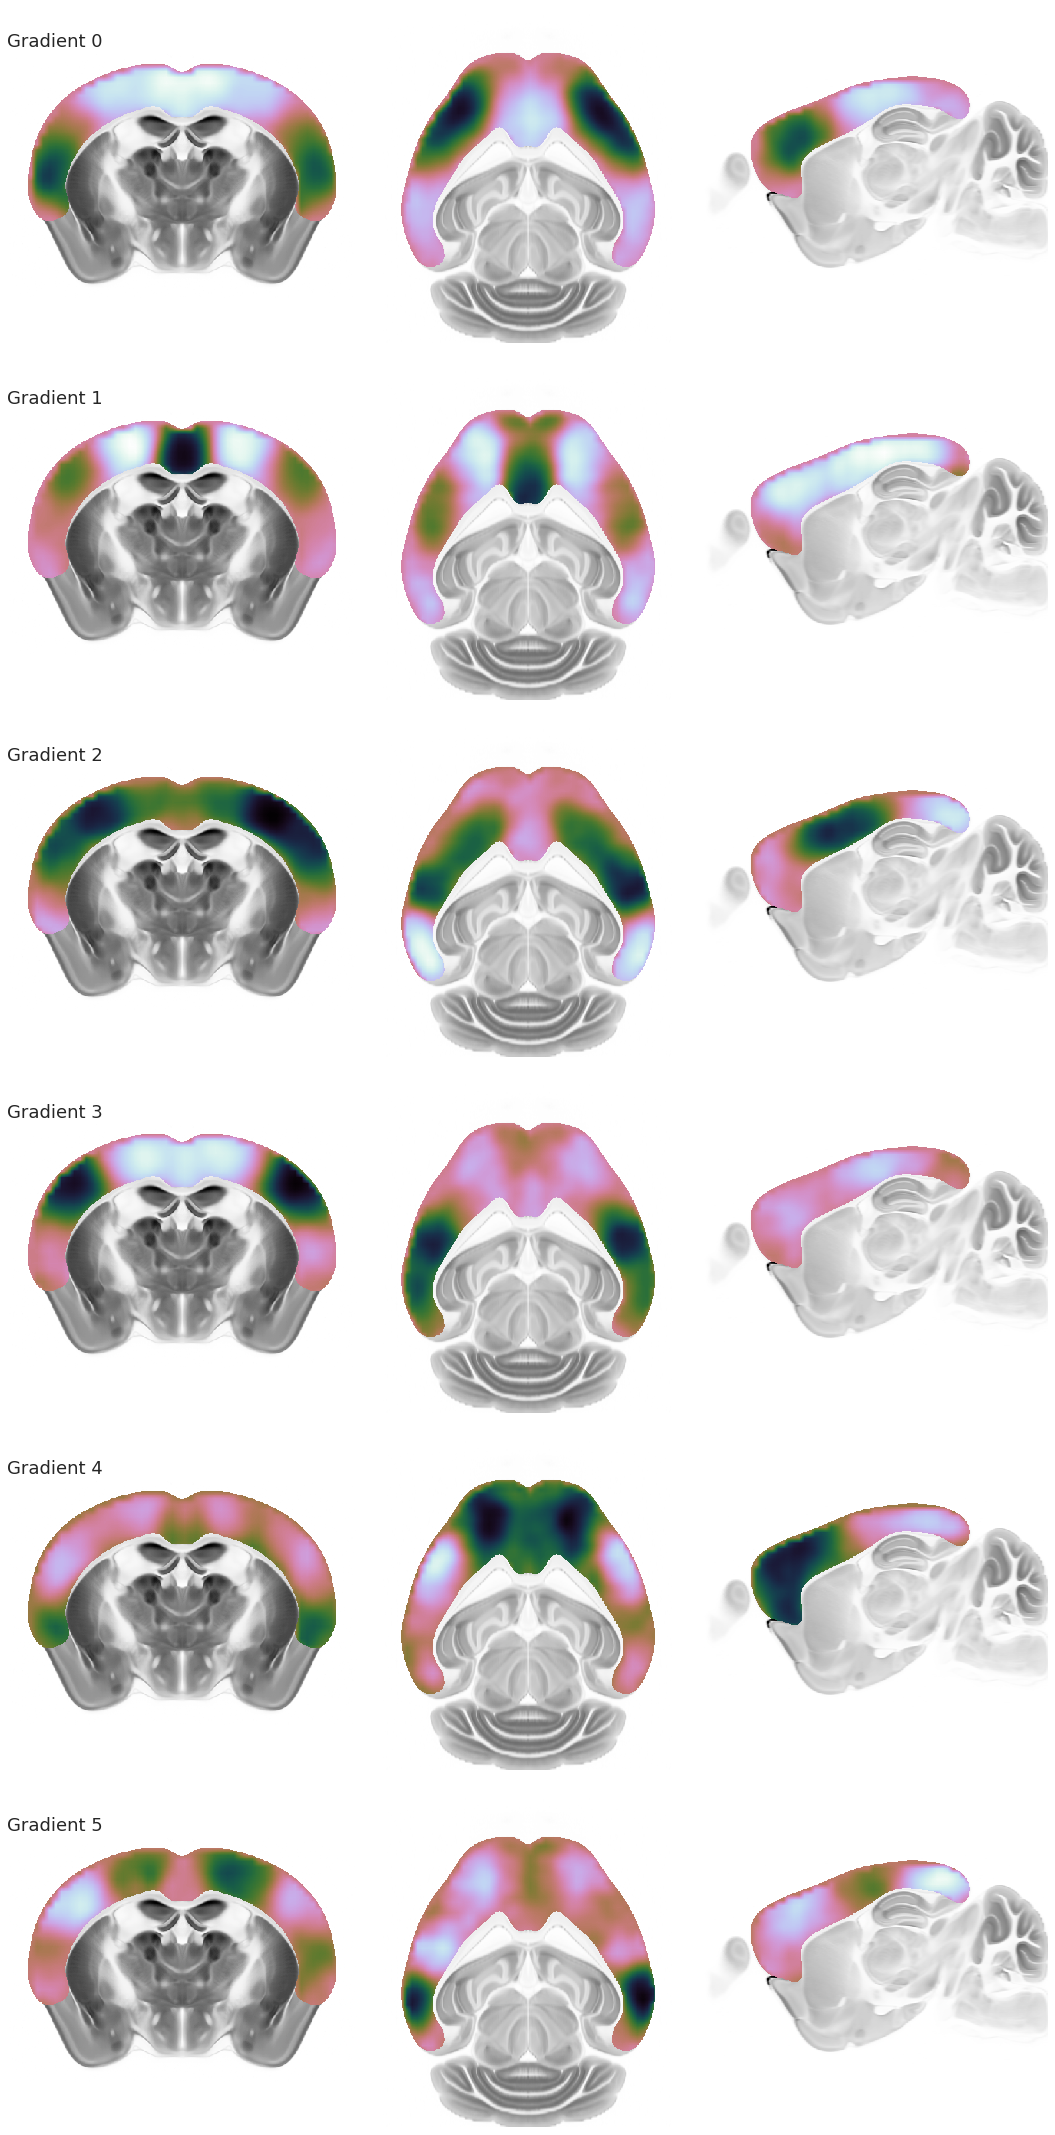

In [12]:
fig = plt.figure(figsize=(15,30))
for g in range(6):
    
    gradient_allen = jo2allen_vol(nb.load('/home/julia/data/gradients/results/gradient000%s_highres.nii.gz'%str(g)).get_data())
    gradient_allen[mask_allen==0] = np.nan
    vmin, vmax = np.nanmin(gradient_allen), np.nanmax(gradient_allen)
    
    template_img = [template[x,:,:], template[:,y,:], template[:,:,z].T]
    gradient_img = [gradient_allen[x,:,:], gradient_allen[:,y,:], gradient_allen[:,:,z].T]
    
    for i in range(3):
        
        fig.add_subplot(6,3,(g*3+(i+1)))
        plt.imshow(template_img[i],  cmap='Greys', aspect='equal');
        plt.imshow(gradient_img[i],  cmap="cubehelix_r", aspect='equal', vmin=vmin, vmax=vmax);
        if i == 0:
            plt.title('Gradient %s' %g, loc='left')
        plt.axis('off');

plt.tight_layout()

In [13]:
fig.savefig('/home/julia/Documents/projects/mouse_gradients/gradient_0to5.png')